Write a Program for the correlation function to automate the process of selecting the important
variables from the dataset.
Def cor_var(df):
Corrmat = df.corr()
Iterarate over this matrix and drop the columns which are more than 75% correlated

Output :
C1 C2 C3 C4 C5
cor(C1, C5) = 0.89
cor(C2,C3) = 096
Answer : C1 C2 C4 (Take only these columns for the model building)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_house=pd.read_csv(r'C:\Users\archa\Downloads\HouseData.csv')

In [6]:
x=df_house.drop("SalePrice",axis=1)
y=df_house["SalePrice"]

In [49]:
x.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359


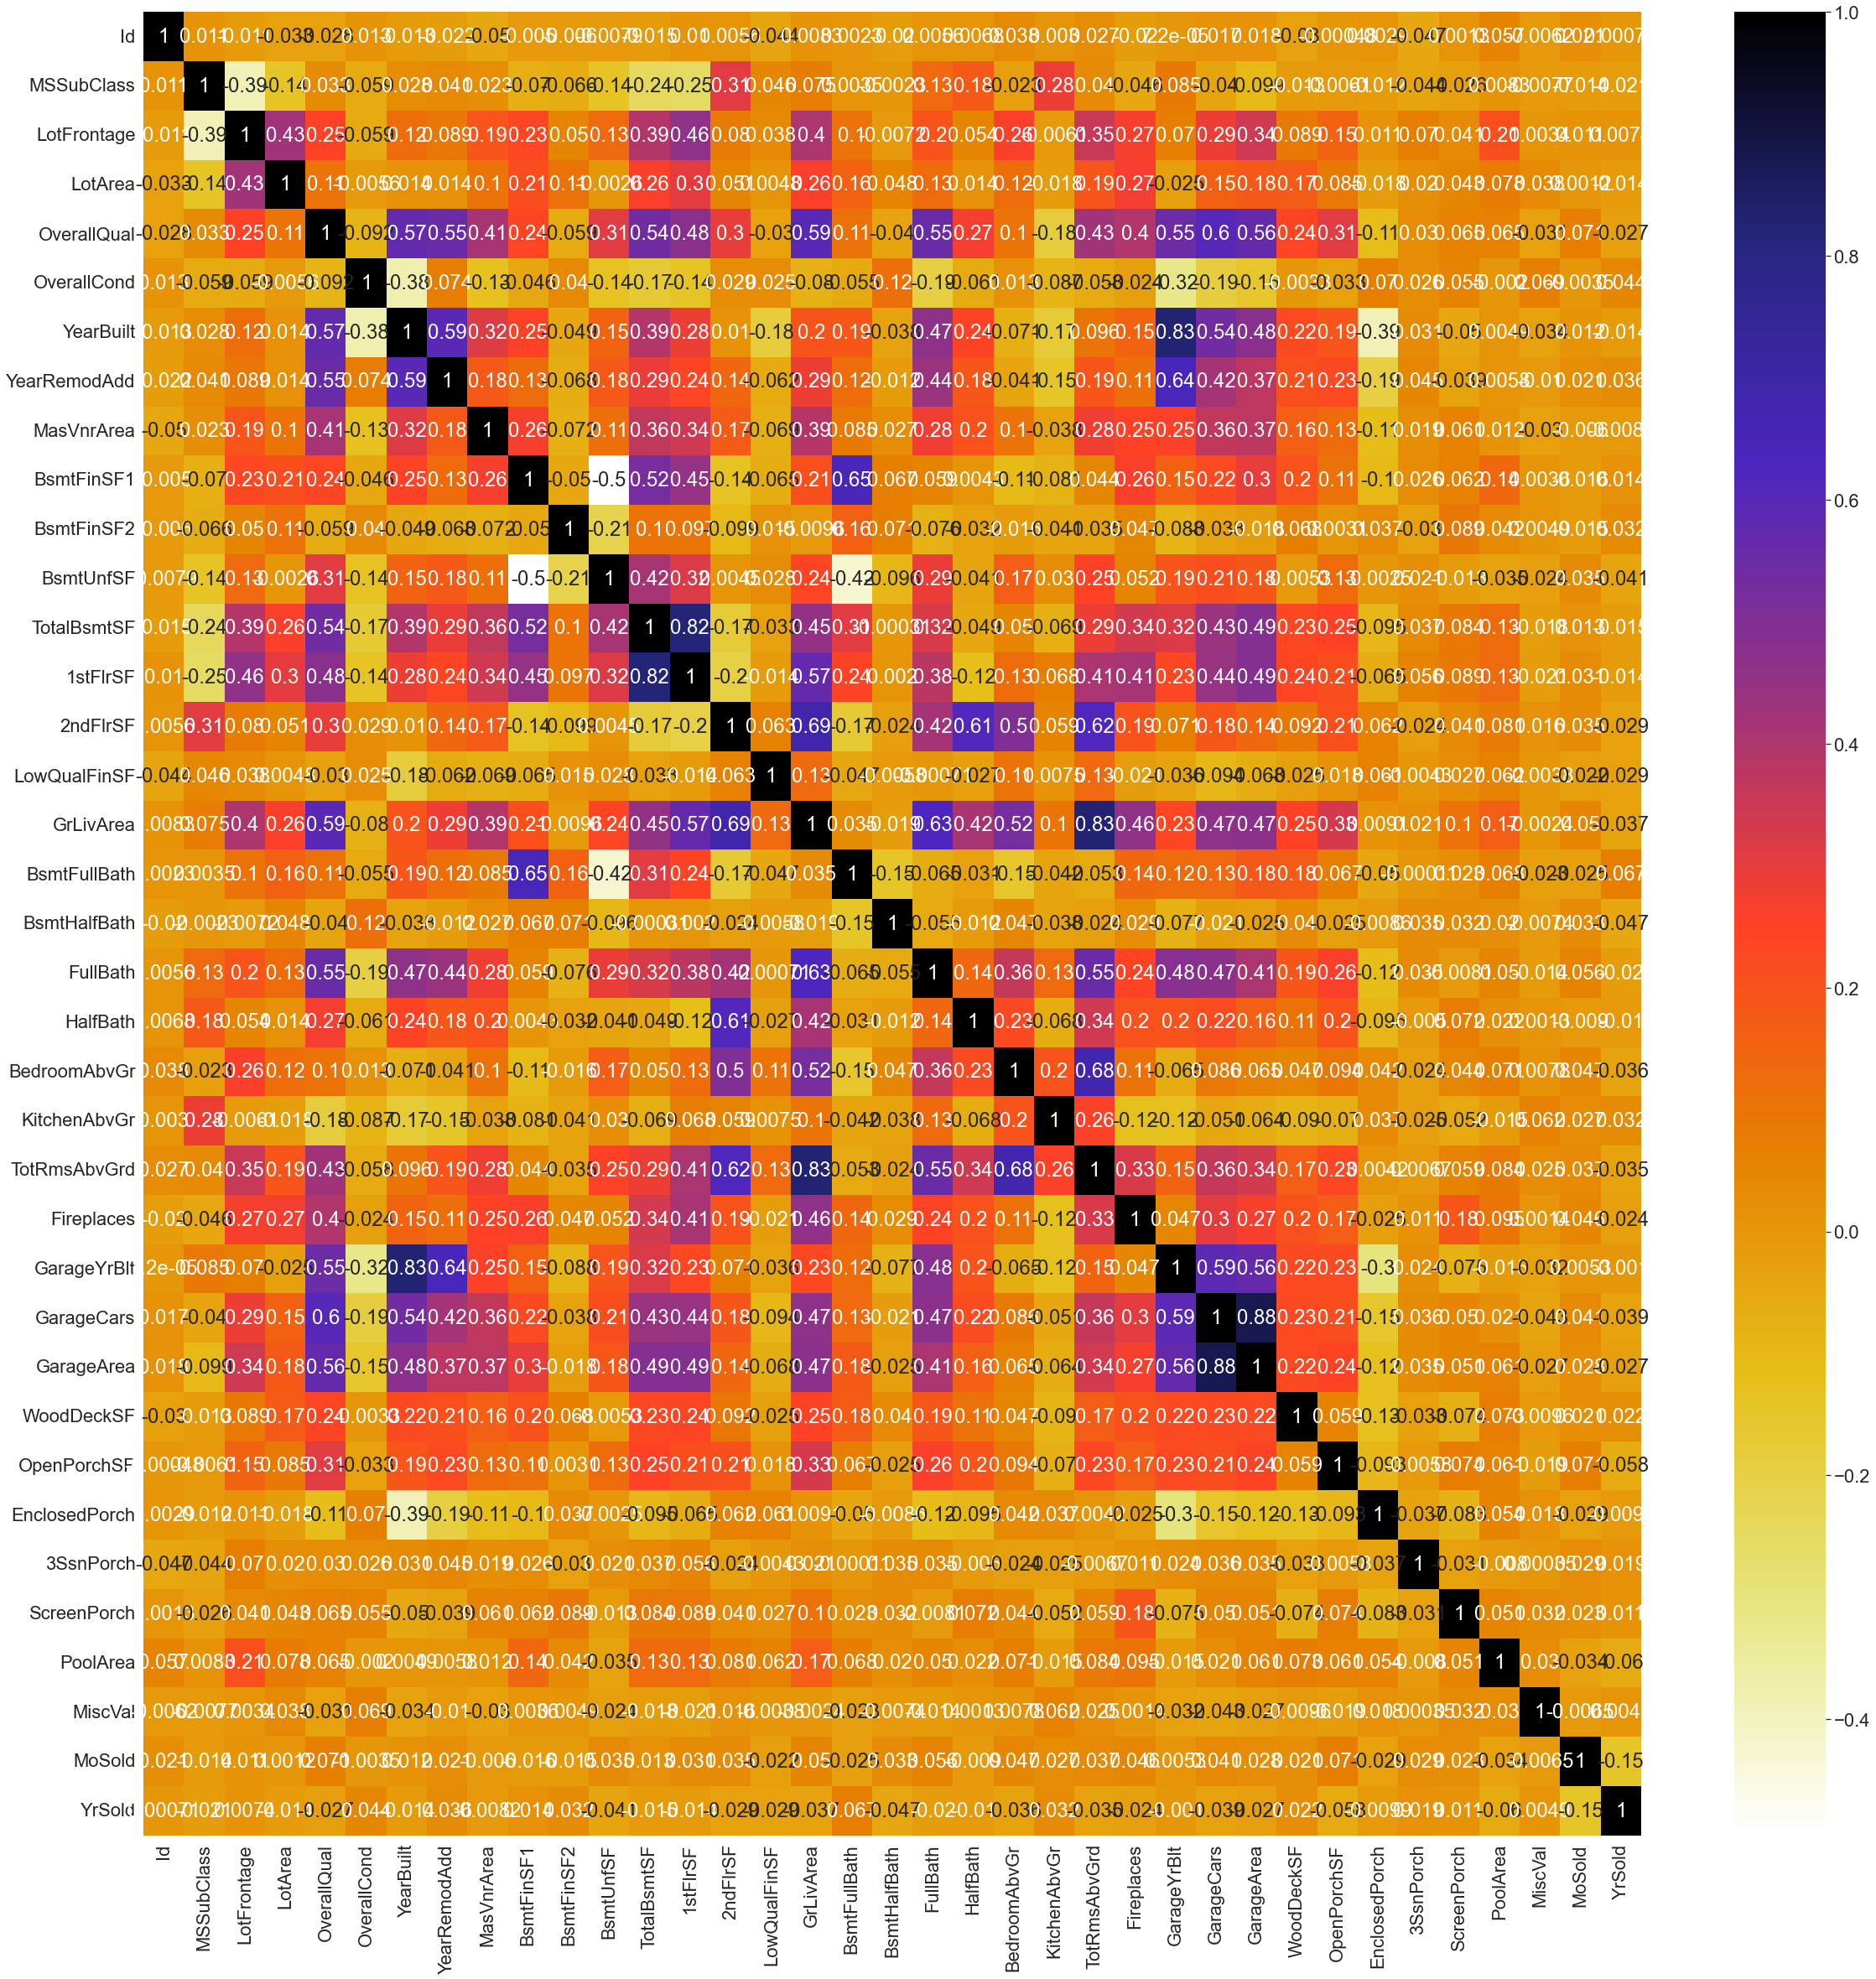

In [48]:
import seaborn as sns
plt.figure(figsize=(40,40))
cor=x.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
sns.set(font_scale=1)
plt.show()

k=80
cm=np.corrcoef(x.values.T)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='0.2f',annot_kws={'size':10})
sns.set(font_scale=1)                
plt.show()

In [89]:
def cor_var(dataframe):
    corr_matrix=dataframe.corr()
    corr_values=dict()
    column_name=[]
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>0.75 or (corr_matrix.iloc[i,j])<-0.75:
                col1=corr_matrix.columns[i]
                col2=corr_matrix.columns[j]
                corr_values[(col1,col2)]=(("%.2f"%corr_matrix.iloc[i,j]))
                column_name.append(col1)
                
    return print( corr_values,f'{column_name} Take only these columns for the model building.',sep='\n')
                             
cor_var(x)

{('1stFlrSF', 'TotalBsmtSF'): '0.82', ('TotRmsAbvGrd', 'GrLivArea'): '0.83', ('GarageYrBlt', 'YearBuilt'): '0.83', ('GarageArea', 'GarageCars'): '0.88'}
['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'] Take only these columns for the model building.
